In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic Eco


Text(0.5, 1.0, '한글 제목')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_te

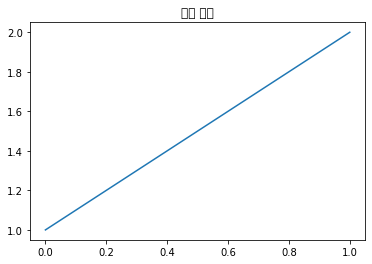

In [ ]:
plt.plot([1,2])
plt.title("한글 제목")

In [ ]:
import re
import os
import unicodedata
import urllib3
import zipfile
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Download the data


In [ ]:
!gdown --id 1V6HsBoEczDoo4NDZ1I5iXSfRxFxCatis

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1V6HsBoEczDoo4NDZ1I5iXSfRxFxCatis
To: /content/1_구어체(1).xlsx
100% 15.8M/15.8M [00:00<00:00, 94.9MB/s]


In [ ]:
import pandas as pd

df = pd.read_excel('/content/1_구어체(1).xlsx')
df

,SID,원문,번역문
0,1,'Bible Coloring'은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 ...,Bible Coloring' is a coloring application that...
1,2,씨티은행에서 일하세요?,Do you work at a City bank?
2,3,푸리토의 베스트셀러는 해외에서 입소문만으로 4차 완판을 기록하였다.,"PURITO's bestseller, which recorded 4th rough ..."
3,4,11장에서는 예수님이 이번엔 나사로를 무덤에서 불러내어 죽은 자 가운데서 살리셨습니다.,In Chapter 11 Jesus called Lazarus from the to...
4,5,"6.5, 7, 8 사이즈가 몇 개나 더 재입고 될지 제게 알려주시면 감사하겠습니다.",I would feel grateful to know how many stocks ...
...,...,...,...
199995,199996,나는 먼저 청소기로 바닥을 밀었어요.,"First of all, I vacuumed the floor."
199996,199997,나는 먼저 팀 과제를 하고 놀러 갔어요.,I did the team assignment first and went out t...
199997,199998,나는 비 같은 멋진 연예인을 좋아해요.,I like cool entertainer like Rain.
199998,199999,나는 멋진 자연 경치를 보고 눈물을 흘렸어.,I cried seeing the amazing scenery.


In [ ]:
print (df.원문.map(lambda x: len(x)).max())

109


In [ ]:
df['번역문'].isnull().values.any()

False

## Modeling


In [ ]:
# 직접 만들어보세요!

In [ ]:
batch_size = 128  # Batch size for training.
epochs = 100  # Number of epochs to train for.
hidden_units = 256  # Latent dimensionality of the encoding space.
embedding_dim = 150
num_samples = 200000  # Number of samples to train on.

In [ ]:
def preprocess_sentence(sent):

  # 단어와 구두점 사이에 공백을 만듭니다.
  # Ex) "he is a boy." => "he is a boy ."
  sent = re.sub(r"([?.!,¿])", r" \1", sent)

  # (a-z, A-Z, ".", "?", "!", ",") 이들을 제외하고는 전부 공백으로 변환합니다.
  sent = re.sub(r"[^a-zA-Z가-힣ㄱ-ㅎ0-9!.?':;]+", r" ", sent)

  # 다수 개의 공백을 하나의 공백으로 치환
  sent = re.sub(r"\s+", " ", sent)
  return sent

In [ ]:
def load_preprocessed_data():
  encoder_input, decoder_input, decoder_target = [], [], []
  
  # source 데이터와 target 데이터 분리
  for i in range(len(df)):
    src_line = df['원문'][i]
    tar_line = df['번역문'][i]

    # source 데이터 전처리
    src_line = [w for w in preprocess_sentence(src_line).split()]

    # target 데이터 전처리
    tar_line = preprocess_sentence(tar_line)
    tar_line_in = [w for w in ("<sos> " + tar_line).split()]  # teacher forcing을 위한 정답셋 
    tar_line_out = [w for w in (tar_line + " <eos>").split()]

    encoder_input.append(src_line)
    decoder_input.append(tar_line_in)
    decoder_target.append(tar_line_out)

    if i == num_samples - 1:
      break
              
  return encoder_input, decoder_input, decoder_target

In [ ]:
# src_line = df['번역문'][0]
# src_line
# # src_line = [w for w in preprocess_sentence(src_line).split()]

In [ ]:
sents_kr_in, sents_en_in, sents_en_out  = load_preprocessed_data()

In [ ]:
# 한국어
tokenizer_kr = Tokenizer(filters="", lower=False)
tokenizer_kr.fit_on_texts(sents_kr_in)


# 인코더 데이터
encoder_input = tokenizer_kr.texts_to_sequences(sents_kr_in)

In [ ]:
# 영어
tokenizer_en = Tokenizer(filters="", lower=False)
tokenizer_en.fit_on_texts(sents_en_in)
tokenizer_en.fit_on_texts(sents_en_out)

# 디코더 데이터
decoder_input = tokenizer_en.texts_to_sequences(sents_en_in)
decoder_target = tokenizer_en.texts_to_sequences(sents_en_out)

In [ ]:
decoder_target[-5:]

[[448, 11, 65, 5, 47308, 4, 528, 1, 3],
 [5, 152, 4, 331, 2335, 109, 10, 153, 76, 6, 312, 1, 3],
 [5, 35, 1031, 9419, 35, 8158, 1, 3],
 [5, 2913, 977, 4, 1599, 2017, 1, 3],
 [5, 215, 651, 6, 7, 225, 726, 117, 328, 1, 3]]

각 문장을 입력층의 최대 길이만큼 패딩(padding)을 수행합니다. 

In [ ]:
encoder_input = pad_sequences(encoder_input, padding='post')
decoder_input = pad_sequences(decoder_input, padding='post')
decoder_target = pad_sequences(decoder_target, padding='post')

In [ ]:
print('인코더의 입력의 크기(shape) :',encoder_input.shape)
print('디코더의 입력의 크기(shape) :',decoder_input.shape)
print('디코더의 레이블의 크기(shape) :',decoder_target.shape)

인코더의 입력의 크기(shape) : (200000, 31)
디코더의 입력의 크기(shape) : (200000, 55)
디코더의 레이블의 크기(shape) : (200000, 55)


샘플은 총 200,000개 존재하며 한국어 문장의 길이는 32, 영어 문장의 길이는 57입니다. 단어 집합의 크기를 정의합니다.


In [ ]:
print(tokenizer_en.word_index['<eos>'])
print(tokenizer_kr.word_index['.'])

3
1


In [ ]:
src_vocab_size = len(tokenizer_kr.word_index) + 1
tar_vocab_size = len(tokenizer_en.word_index) + 1

print(f"한국어 단어 집합의 크기 : {src_vocab_size}, 영어 단어 집합의 크기 : {tar_vocab_size}")

한국어 단어 집합의 크기 : 202466, 영어 단어 집합의 크기 : 47309


단어로부터 정수를 얻는 딕셔너리와 정수로부터 단어를 얻는 딕셔너리를 각각 만들어줍니다. 이들은 훈련을 마치고 예측값과 실제값을 비교하는 단계에서 사용합니다. 

In [ ]:
src_to_index = tokenizer_kr.word_index  # word : idx
index_to_src = tokenizer_kr.index_word  # idx : word
tar_to_index = tokenizer_en.word_index # word : idx
index_to_tar = tokenizer_en.index_word # idx : word

In [ ]:
index_to_src[100], index_to_tar[100]

('가지고', 'lot')

In [ ]:
from itertools import islice

def take(n, iterable):
    """Return the first n items of the iterable as a list."""
    return list(islice(iterable, n))

n_items = take(5, tar_to_index.items())
n_items

[('.', 1), ('<sos>', 2), ('<eos>', 3), ('the', 4), ('I', 5)]

테스트 데이터를 분리하겠습니다. 인코더 input, 디코더 input, 디코더 output이 동일하게 분리되어야 하기 때문에 랜덤한 정수배열을 만들어 직접 나누겠습니다. 

우선 랜덤하게 시퀀스를 섞습니다. 

In [ ]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print('랜덤 시퀀스 :',indices)

랜덤 시퀀스 : [ 51728  52825 105837 ... 157409 187518 153070]


In [ ]:
# 배열
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [ ]:
decoder_input[indices[0]], decoder_target[indices[0]]

(array([   2,   42,   23,   21,  729,    6,   50,   52,  367,   48,    4,
         217,    9, 1898,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       dtype=int32),
 array([  42,   23,   21,  729,    6,   50,   52,  367,   48,    4,  217,
           9, 1898,    1,    3,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       dtype=int32))

In [ ]:
n_of_val = int(num_samples*0.1)

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

In [ ]:
print('훈련 source 데이터의 크기 :',encoder_input_train.shape)
print('훈련 target 데이터의 크기 :',decoder_input_train.shape)
print('훈련 target 레이블의 크기 :',decoder_target_train.shape)
print('테스트 source 데이터의 크기 :',encoder_input_test.shape)
print('테스트 target 데이터의 크기 :',decoder_input_test.shape)
print('테스트 target 레이블의 크기 :',decoder_target_test.shape)

훈련 source 데이터의 크기 : (180000, 31)
훈련 target 데이터의 크기 : (180000, 55)
훈련 target 레이블의 크기 : (180000, 55)
테스트 source 데이터의 크기 : (20000, 31)
테스트 target 데이터의 크기 : (20000, 55)
테스트 target 레이블의 크기 : (20000, 55)


In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Masking, Attention
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.layers import Input

# 인코더
encoder_inputs = Input(shape=(None, ))

# 임베딩 층
enc_emb = Embedding(src_vocab_size, embedding_dim)(encoder_inputs)

# 상태값 리턴을 위해 return_state는 True
encoder_lstm = LSTM(hidden_units, return_state = True, return_sequences = True)

# 은닉 상태와 셀 상태를 리턴
encoder_outputs, state_h1, state_c1 =  encoder_lstm(enc_emb)
_, state_h2, state_c2 = LSTM(hidden_units, return_state=True)(encoder_outputs)

encoder_states = [state_h1, state_c1, state_h2, state_c2] # 인코더의 은닉 상태와 셀 상태를 저장

디코더에서는 attention layer를 추가합니다. 
- 이때, s_는 은닉상태와 디코더의 최종 출력은 연결해야 하므로, shape을 맞춰주기 위하여 축을 추가합니다. 
- attention layer는 디코더의 은닉상태와 인코더의 은닉상태 전체를 받아 컨텍스트 벡터를 생성합니다. 
- 마지막으로 생성한 컨텍스트 벡터와 디코더의 은닉상태 전체를 softmax layer에 넣고 인덱스를 예측합니다. 


In [ ]:
state_h1[:, tf.newaxis, :]

<KerasTensor: shape=(None, 1, 256) dtype=float32 (created by layer 'tf.__operators__.getitem')>

In [ ]:
# 디코더
decoder_inputs = Input(shape=(None, ))

# 임베딩 층
dec_emb_layer = Embedding(tar_vocab_size, hidden_units)

# 임베딩 결과
dec_emb = dec_emb_layer(decoder_inputs)

# 상태값 리턴을 위해 return_state는 True, 모든 시점에 대해서 단어를 예측하기 위해 return_sequences는 True
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state = True)
decoder_lstm2 = LSTM(hidden_units, return_sequences=True, return_state = True)

# 인코더의 은닉 상태를 초기 은닉 상태(initial_state)로 사용
decoder_outputs, decoder_h1, decoder_c1 = decoder_lstm(dec_emb, initial_state = [state_h1, state_c1])
final, decoder_h2, decoder_c2 = decoder_lstm2(decoder_outputs, initial_state= [state_h2, state_c2])

# attention
S_ = tf.concat([state_h2[:, tf.newaxis, :], final[:, :-1, :]], axis=1) # query 

attention = Attention(hidden_units)
context_vector, _ = attention([ S_, encoder_outputs], return_attention_scores = True)

concat = tf.concat([final, context_vector], axis=-1)

# 모든 시점의 결과에 대해서 소프트맥스 함수를 사용한 출력층을 통해 단어 예측
decoder_dense = Dense(tar_vocab_size, activation = 'softmax')
decoder_outputs = decoder_dense(concat)

In [ ]:
# 모델의 입력과 출력을 정의.
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 150)    30369900    ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, None, 256)    12111104    ['input_2[0][0]']                
                                                                                              

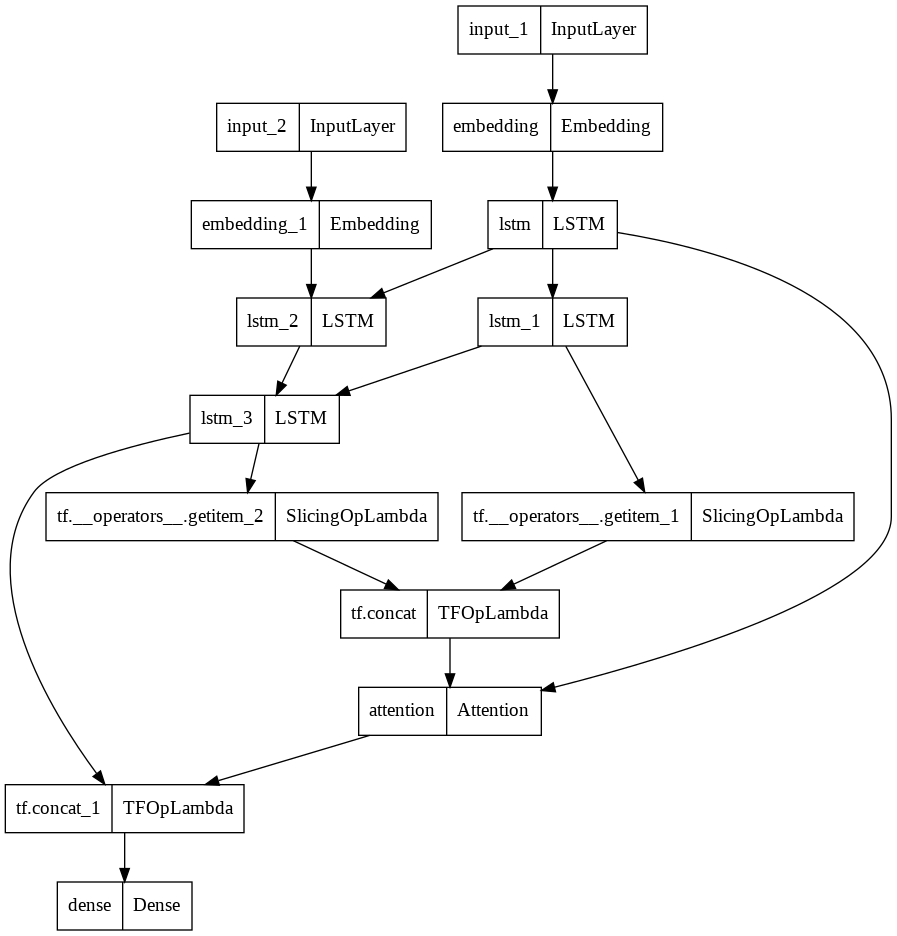

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', )

In [ ]:
model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, 
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size=256, epochs=3)

Epoch 1/3


In [ ]:
# 인코더 - 훈련과 동일 
encoder_model = Model(encoder_inputs, [encoder_outputs, encoder_states])

In [ ]:
# 디코더 

# 이전 시점의 상태를 보관할 텐서
decoder_state_input_h1 = Input(shape=(hidden_units,))
decoder_state_input_c1 = Input(shape=(hidden_units,))
decoder_state_input_h2 = Input(shape=(hidden_units,))
decoder_state_input_c2 = Input(shape=(hidden_units,))

query_vec = Input(shape=(hidden_units,))
encoder_outputs2 = Input(shape =(None, hidden_units,))

decoder_states_inputs = [decoder_state_input_h1, decoder_state_input_c1, decoder_state_input_h2, decoder_state_input_c2]

# 훈련 때 사용했던 임베딩 층을 재사용
dec_emb2 = dec_emb_layer(decoder_inputs)

# 다음 단어 예측을 위해 이전 시점의 상태를 현 시점의 초기 상태로 사용
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h1, decoder_state_input_c1])
decoder_outputs3, state_h3, state_c3 = decoder_lstm2(decoder_outputs2, initial_state=[decoder_state_input_h2, decoder_state_input_c2])
decoder_states3 = [state_h2, state_c2, state_h3, state_c3]


# attention
S_ = tf.concat([query_vec[:, tf.newaxis, :], decoder_outputs3[:, :-1, :]], axis=1) # query 

attention = Attention(hidden_units)

context_vector, att_score = attention([S_, encoder_outputs2], return_attention_scores = True)
decoder_concat = tf.concat([decoder_outputs3, context_vector], axis=-1)

# 모든 시점에 대해서 단어 예측 (Fully Connected)
decoder_outputs3 = decoder_dense(decoder_concat)

# 수정된 디코더
decoder_model = Model(
    [decoder_inputs, query_vec, encoder_outputs2] + decoder_states_inputs,
    [decoder_outputs3, att_score] + decoder_states3)

In [ ]:
decoder_model.predict

In [ ]:
# 수정된 디코더

# encoder_model = Model(encoder_inputs, encoder_states)
# decoder_model = Model(
#     [decoder_inputs, query_vec, encoder_outputs2] + decoder_states_inputs,
#     [decoder_outputs3, att_score] + decoder_states3)



def decode_sequence(input_seq):
  # 입력으로부터 인코더의 마지막 시점의 상태(은닉 상태, 셀 상태)를 얻음
  encoder_outputs, states_value = encoder_model.predict(input_seq)

  # <SOS>에 해당하는 정수 생성
  target_seq = np.zeros((1,1))
  target_seq[0, 0] = tar_to_index['<sos>']

  stop_condition = False
  decoded_sentence = ''

  # stop_condition이 True가 될 때까지 루프 반복
  # 구현의 간소화를 위해서 이 함수는 배치 크기를 1로 가정합니다.
  while not stop_condition:
    # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
    output_tokens, att_score, h1, c1, h2, c2 = decoder_model.predict([target_seq, states_value[3], encoder_outputs] + states_value, verbose = 0)

    # 예측 결과를 단어로 변환
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    sampled_char = index_to_tar[sampled_token_index]

    # 현재 시점의 예측 단어를 예측 문장에 추가
    decoded_sentence += ' '+sampled_char

    # <eos>에 도달하거나 정해진 길이를 넘으면 중단.
    if (sampled_char == '<eos>' or len(decoded_sentence) > 200):
        stop_condition = True

    # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = sampled_token_index

    # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
    states_value = [h1, c1, h2, c2]

  return decoded_sentence

In [ ]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_src(input_seq):
  sentence = ''
  for encoded_word in input_seq:
    if(encoded_word != 0):
      sentence = sentence + index_to_src[encoded_word] + ' '
  return sentence

# 번역문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_tar(input_seq):
  sentence = ''
  for encoded_word in input_seq:
    if(encoded_word != 0 and encoded_word != tar_to_index['<sos>'] and encoded_word != tar_to_index['<eos>']):
      sentence = sentence + index_to_tar[encoded_word] + ' '
  return sentence

In [ ]:
for seq_index in [3, 50, 100, 300, 1001]:
  input_seq = encoder_input_train[seq_index: seq_index + 1]
  decoded_sentence = decode_sequence(input_seq)

  print("입력문장 :",seq_to_src(encoder_input_train[seq_index]))
  print("정답문장 :",seq_to_tar(decoder_input_train[seq_index]))
  print("번역문장 :",decoded_sentence[1:-5])
  print("-"*50)

## BLEU Score (Bilingual Evaluation Understudy Score)
기계 번역의 성능이 얼마나 뛰어난가를 측정하기 위해 사용되는 대표적인 방법 중 하나인 BLEU(Bilingual Evaluation Understudy)를 측정해봅시다. 
- 논문 : BLEU: a Method for Automatic Evaluation of Machine Translation
- BLEU 점수는 기계 번역된 텍스트와 고품질 참조 번역 세트의 유사성을 측정하는 0과 1 사이의 숫자입니다. 
    - 값이 0이면 기계 번역된 출력이 참조 번역과 겹치는 부분이 없는 것을 의미하고(저품질)
    - 1이면 참조 번역과 완벽하게 겹치는 것을 의미합니다(고품질)

- BLEU 설명 
    - https://jrc-park.tistory.com/273
    - https://wikidocs.net/31695
    - https://cloud.google.com/translate/automl/docs/evaluate?hl=ko#bleu

In [ ]:
import numpy as np
from collections import Counter
from nltk import ngrams

BLEU는 기계 번역 결과와 사람이 직접 번역한 결과가 얼마나 유사한지 비교하여 번역에 대한 성능을 측정하는 방법입니다. 

In [ ]:
import nltk.translate.bleu_score as bleu

candidate = 'It is a guide to action which ensures that the military always obeys the commands of the party'
references = [
    'It is a guide to action that ensures that the military will forever heed Party commands',
    'It is the guiding principle which guarantees the military forces always being under the command of the Party',
    'It is the practical guide for the army always to heed the directions of the party'
]

print('패키지 NLTK의 BLEU :',bleu.sentence_bleu(list(map(lambda ref: ref.split(), references)),candidate.split()))

In [ ]:
ref_train = [seq_to_tar(sen) for sen in decoder_input_train[:100]]

In [ ]:
from tqdm.notebook import tqdm 

pred_train = []
for idx in tqdm(range(len(encoder_input_train[:100]))):
    pred_train.append(decode_sequence(encoder_input_train[idx:idx+1]))

In [ ]:
bleu_score = 0
for ref, pred in zip(ref_train, pred_train):
    if len(ref) == 0 or len(pred) == 0:
        continue
    bleu_score += bleu.sentence_bleu(ref, pred)

bleu_score = bleu_score/len(ref_train)
bleu_score

In [ ]:
ref_test = [seq_to_tar(sen) for sen in decoder_input_test[:100]]
pred_test = [decode_sequence(encoder_input_test[idx:idx+1]) for idx in tqdm(range(len(encoder_input_test[:100])))]

bleu_score = 0
for ref, pred in zip(ref_test, pred_test):
    if len(ref) == 0 or len(pred) == 0:
        continue
    bleu_score += bleu.sentence_bleu(ref, pred)

bleu_score = bleu_score/len(ref_test)
bleu_score

### Reference

- https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html
- https://wikidocs.net/86900